***Demonstrate the perceptron learning law with its decision regions using python***

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
weights = np.random.rand(2)
bias = np.random.rand()
t = 0.5
lr = 0.1

In [19]:
def step_function(sum):
    if sum >= t:
        return 1
    else:
        return 0

In [20]:
def perceptron(x):
    sum = np.dot(x, weights) + bias
    return step_function(sum)

In [21]:
def train(num, target):
    global weights, bias, lr
    out = perceptron(num)
    error = target - out
    weights += lr*error*num
    bias += lr*error

In [22]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

epochs = 20
for epoch in range(epochs):
    for num, target in zip(x, y):
        train(num, target)

In [23]:
test = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])

In [24]:
result = []
for i in test:
    result.append(perceptron(i))
for i in range(len(test)):
    print(test[i],"\t\t ", result[i])

[1 1] 		  1
[1 0] 		  0
[0 1] 		  0
[0 0] 		  0


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_22228\1997033114.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, z, levels=[0.5], color='black', linestyles='--')


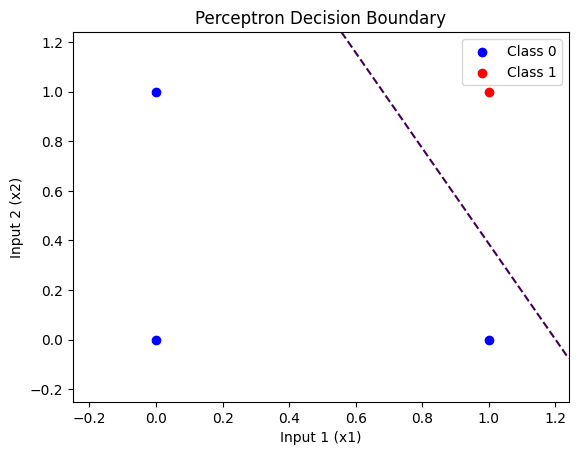

In [25]:
x_min, x_max = x[:, 0].min() - 0.25, x[:, 0].max() + 0.25
y_min, y_max = x[:, 1].min() - 0.25, x[:, 1].max() + 0.25

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights)+bias
z = z.reshape(xx.shape)

plt.contour(xx, yy, z, levels=[0.5], color='black', linestyles='--')

plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', label='Class 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='red', label='Class 1')

plt.xlabel('Input 1 (x1)')
plt.ylabel('Input 2 (x2)')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()